<a href="https://colab.research.google.com/github/Prabhitha/Self-Driving-Car_OpenCV/blob/master/Traffic_Signs_classficication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries

import cv2
import pickle
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import keras
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D 
from tensorflow.python.keras.backend import categorical_crossentropy

In [ ]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [ ]:
np.random.seed(0)

In [ ]:
# Loading Train data
with open('/content/german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(f)

# Loading validation data
with open('/content/german-traffic-signs/valid.p', 'rb') as f:
  val_data = pickle.load(f)

# Loading Test data
with open('/content/german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f)

In [ ]:
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [ ]:
# Check whether the number of images and the labels are equal

assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels"
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels"

In [ ]:
# Reading the traffic sign_names data

sign_data = pd.read_csv('/content/german-traffic-signs/signnames.csv')
print(sign_data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

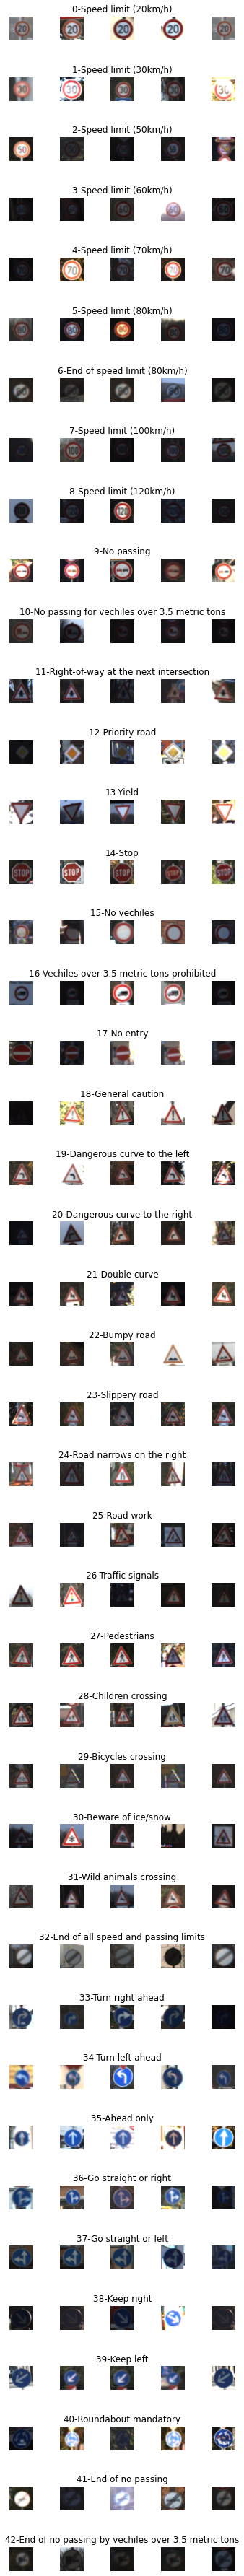

In [ ]:
# Displaying random sample of training images from all the classes

num_of_samples = []

cols = 5
num_classes = 43

fig, ax = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()

for i in range(cols):
  for j, row in sign_data.iterrows():
    x_selected = X_train[y_train == j]
    ax[j][i].imshow(x_selected[random.randint(0,(len(x_selected)-1)), :, :], cmap=plt.get_cmap('gray'))
    ax[j][i].axis('off')
    if i == 2:
      ax[j][i].set_title(str(j) + '-' + row['SignName'])
      num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


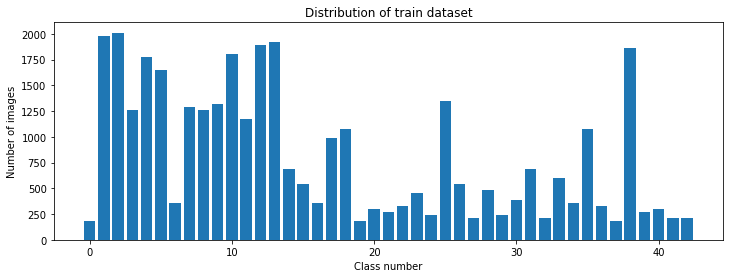

In [ ]:
# Displaying the frquency of the data in bar chart

print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes), num_of_samples)
plt.title("Distribution of train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

The Shape of the image: (32, 32, 3)
The output label: 36


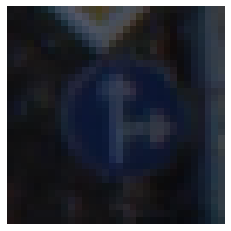

In [ ]:
# Printing a random image

plt.imshow(X_train[1000])
plt.axis('off')
print("The Shape of the image:", X_train[1000].shape)
print("The output label:", y_train[1000])

### Pre-processing

Shape of grayscale image: (32, 32)


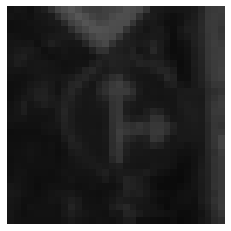

In [ ]:
# Converting RGB to Grayscale
# 1. Color doesn't play significant role to classify the traffic signs. 
# 2. By reducing it from color to grayscale, we are reducing the number of parameters.

def grayscale(img):
  img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  return img

img = grayscale(X_train[1000])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
print("Shape of grayscale image:", img.shape)

Shape of image: (32, 32)


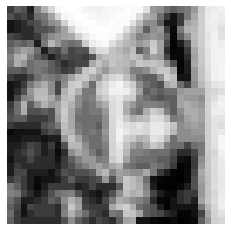

In [ ]:
# Histogram Equalization 
# It is used to standardize the lighting in all our images and it accepts only grayscale iamges

def equalize(img):
  img = cv2.equalizeHist(img)
  return img

img = equalize(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
print("Shape of image:", img.shape)

In [ ]:
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  img = img/255  # Normalizing the image
  return img

X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))

(34799, 32, 32)


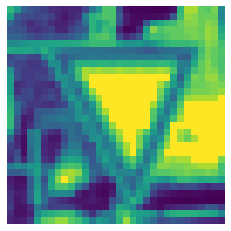

In [ ]:
plt.imshow(X_train[random.randint(0, len(X_train)-1)])
plt.axis('off')
print(X_train.shape)

In [ ]:
# Adding the depth, so that it can be given as input to Convolutional layer

X_train = X_train.reshape(34799, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


In [ ]:
# Performing one hot encoding

y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)
y_test = to_categorical(y_test, 43)
print(y_train)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## LeNet Model

### To improve accuracy: 
1. Reduce the learning rate
2. Increase the no. of filters inside the convolutional layer

In [ ]:
def leNet_model():
  model = Sequential()
  model.add(Conv2D(60, (5,5), input_shape=(32,32,1), activation='relu'))  # No padding because we don't want to preserve the data in the edges
  model.add(MaxPooling2D(pool_size=(2,2)))  # reduce the size by half because of pooling
  model.add(Conv2D(30, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())     # reshape into 1-dim array
  model.add(Dense(500, activation='relu'))  #fully connected layer
  model.add(Dropout(0.5))  # 0.5- half the input nodes will be dropped
  model.add(Dense(num_classes, activation='softmax'))

  #Compile model
  model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model  

In [ ]:
model = leNet_model()
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 60)        1560      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 60)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 12, 12, 30)        16230     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 30)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1080)              0         
                                                                 
 dense_12 (Dense)            (None, 500)              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val,y_val), batch_size=400, verbose=1, shuffle=1)

Epoch 1/10
87/87 [==============================] - 6s 64ms/step - loss: 2.2934 - accuracy: 0.3908 - val_loss: 0.9083 - val_accuracy: 0.7544
Epoch 2/10
87/87 [==============================] - 5s 61ms/step - loss: 0.6271 - accuracy: 0.8125 - val_loss: 0.4217 - val_accuracy: 0.8728
Epoch 3/10
87/87 [==============================] - 5s 60ms/step - loss: 0.3209 - accuracy: 0.9054 - val_loss: 0.2759 - val_accuracy: 0.9127
Epoch 4/10
87/87 [==============================] - 5s 61ms/step - loss: 0.2087 - accuracy: 0.9395 - val_loss: 0.2377 - val_accuracy: 0.9220
Epoch 5/10
87/87 [==============================] - 5s 61ms/step - loss: 0.1580 - accuracy: 0.9542 - val_loss: 0.1986 - val_accuracy: 0.9372
Epoch 6/10
87/87 [==============================] - 5s 62ms/step - loss: 0.1174 - accuracy: 0.9664 - val_loss: 0.1745 - val_accuracy: 0.9476
Epoch 7/10
87/87 [==============================] - 5s 62ms/step - loss: 0.0935 - accuracy: 0.9734 - val_loss: 0.1611 - val_accuracy: 0.9537
Epoch 8/10
87

Text(0.5, 0, 'epoch')

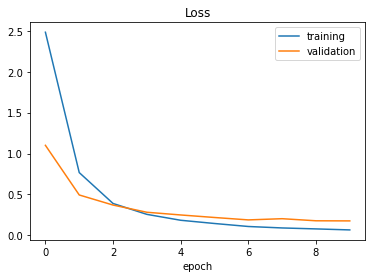

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title(('Loss'))
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

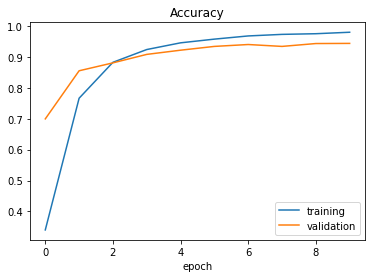

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title(('Accuracy'))
plt.xlabel('epoch')

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Score:', score[0])
print('Test Accuracy:', score[1])

Test Score: 0.2628442347049713
Test Accuracy: 0.9337292313575745


## Modified Model


In [ ]:
# adding more convolutional layer

def modified_model():
  model = Sequential()
  model.add(Conv2D(60, (5,5), input_shape=(32,32,1), activation='relu')) 
  model.add(Conv2D(60, (5,5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2))) 

  model.add(Conv2D(30, (3,3), activation='relu'))
  model.add(Conv2D(30, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.5)) 

  model.add(Flatten())     
  model.add(Dense(500, activation='relu'))  
  model.add(Dropout(0.5))  
  model.add(Dense(num_classes, activation='softmax'))

  #Compile model
  model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model  

In [ ]:
# By adding more convolutional layer, the number of paramters of the model decreased

model = modified_model()
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 60)        1560      
                                                                 
 conv2d_19 (Conv2D)          (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 12, 12, 60)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 10, 10, 30)        16230     
                                                                 
 conv2d_21 (Conv2D)          (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 4, 4, 30)         0         
 g2D)                                                 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val,y_val), batch_size=400, verbose=1, shuffle=1)

Epoch 1/10
87/87 [==============================] - 35s 393ms/step - loss: 2.5165 - accuracy: 0.3217 - val_loss: 0.7590 - val_accuracy: 0.7866
Epoch 2/10
87/87 [==============================] - 35s 398ms/step - loss: 0.7004 - accuracy: 0.7860 - val_loss: 0.2704 - val_accuracy: 0.9179
Epoch 3/10
87/87 [==============================] - 33s 379ms/step - loss: 0.3827 - accuracy: 0.8811 - val_loss: 0.1766 - val_accuracy: 0.9431
Epoch 4/10
87/87 [==============================] - 31s 361ms/step - loss: 0.2790 - accuracy: 0.9140 - val_loss: 0.1285 - val_accuracy: 0.9605
Epoch 5/10
87/87 [==============================] - 31s 357ms/step - loss: 0.2306 - accuracy: 0.9270 - val_loss: 0.0923 - val_accuracy: 0.9703
Epoch 6/10
87/87 [==============================] - 31s 352ms/step - loss: 0.1854 - accuracy: 0.9421 - val_loss: 0.0911 - val_accuracy: 0.9723
Epoch 7/10
87/87 [==============================] - 31s 361ms/step - loss: 0.1573 - accuracy: 0.9509 - val_loss: 0.0788 - val_accuracy: 0.9780

#### No overfitting when the validation loss is less than the training loss and validation accuracy is greater than the training accuracy

Text(0.5, 0, 'epoch')

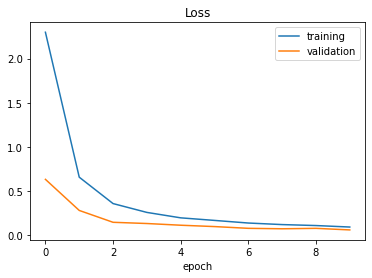

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title(('Loss'))
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

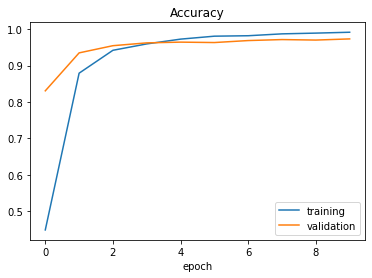

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title(('Accuracy'))
plt.xlabel('epoch')

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Score:', score[0])
print('Test Accuracy:', score[1])

Test Score: 0.13267983496189117
Test Accuracy: 0.964845597743988


## Testing

(-0.5, 865.5, 1389.5, -0.5)

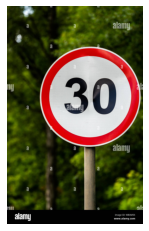

In [ ]:
# Fetch image

import requests
from PIL import Image

url = 'https://c8.alamy.com/comp/WB3M5X/road-sign-speed-limit-30-kilometers-per-hour-on-green-forest-background-with-selective-focus-end-of-youth-symbol-too-vertical-orientation-WB3M5X.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.axis('off')

(32, 32)


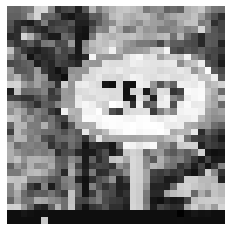

In [ ]:
# Preprocess image

img = np.asarray(img)
img = cv2.resize(img, (32,32))
img = preprocessing(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.axis('off')
print(img.shape)

In [ ]:
img = img.reshape(1,32,32,1)

In [ ]:
predict_x=model.predict(img) 
classes_x=np.argmax(predict_x,axis=1)

print("Predicted sign:", classes_x)

Predicted sign: [38]


(32, 32)
[[6.19783439e-03 1.29116199e-03 1.27944975e-06 8.43437665e-05
  1.02967441e-01 2.80312486e-02 3.11444775e-04 4.75609768e-03
  1.48617495e-02 8.22035072e-04 2.61055800e-04 4.86119177e-07
  1.65370971e-01 9.70094843e-05 1.62100350e-03 1.93471797e-02
  5.43890381e-03 1.56832347e-03 8.85845948e-05 2.28391400e-07
  7.15115224e-04 5.18504848e-08 7.52009464e-06 4.35036924e-07
  1.30172239e-05 8.06028936e-07 4.15225222e-05 2.00144859e-06
  4.45971527e-05 4.66041165e-05 2.01802936e-06 2.77501404e-05
  1.66037530e-02 7.19513482e-05 3.50282673e-04 1.12723500e-01
  6.88503683e-02 6.60778955e-04 1.97829716e-02 2.38582332e-04
  4.25665557e-01 1.73775552e-04 8.58751358e-04]]
Predicted sign: [40]


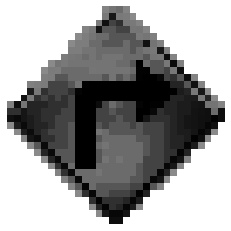

In [ ]:
# Fetch image

import requests
from PIL import Image

url = 'https://www.safetysign.com/images/source/large-images/Y2350.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.axis('off')

# Preprocess image

img = np.asarray(img)
img = cv2.resize(img, (32,32))
img = preprocessing(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.axis('off')
print(img.shape)

img = img.reshape(1,32,32,1)
predict_x = model.predict(img) 
print(predict_x)
classes_x = predict_x.argmax(axis=1)

print("Predicted sign:", classes_x)